In [47]:
from qdrant_client import QdrantClient, models
from itertools import islice

client = QdrantClient("http://localhost:6333")
client.count("biomedical_entity_collection")

CountResult(count=612288)

In [2]:
import os
import pickle
if os.path.exists('entities_dataframe.pkl'):
    with open('entities_dataframe.pkl', 'rb') as f:
        df = pickle.load(f)
        entities = df.to_dict('records')
df.head()

,label,uri,endpoint_url,entity_type,description
0,2-O-(alpha-D-mannopyranosyl)-1-phosphatidyl-1D...,http://purl.obolibrary.org/obo/CHEBI_87673,https://sparql.uniprot.org/sparql/,literal,Chemical entities in ChEBI.
1,"(3E,5Z)-tetradecadienoyl-CoA(4-)",http://purl.obolibrary.org/obo/CHEBI_71586,https://sparql.uniprot.org/sparql/,literal,Chemical entities in ChEBI.
2,(5Z)-tetradecenoyl-CoA(4-),http://purl.obolibrary.org/obo/CHEBI_84650,https://sparql.uniprot.org/sparql/,literal,Chemical entities in ChEBI.
3,(25R)-3beta-hydroxycholest-5-en-7-one-26-al,http://purl.obolibrary.org/obo/CHEBI_87677,https://sparql.uniprot.org/sparql/,literal,Chemical entities in ChEBI.
4,(25R)-3beta-hydroxycholest-5-en-7-one-26-oate,http://purl.obolibrary.org/obo/CHEBI_87678,https://sparql.uniprot.org/sparql/,literal,Chemical entities in ChEBI.


In [26]:
from endpoint_loader import *
import pandas as pd

print(f"Total entities: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print(f"Entity types: {df['entity_type'].unique()}")

Total entities: 2650724
Columns: ['label', 'uri', 'endpoint_url', 'entity_type', 'description']
Entity types: ['literal']


In [48]:
entities_list = [
        # {
        #     "chebi_chemical_entities": {
        #         "uri": "http://purl.obolibrary.org/obo/CHEBI",
        #         "label": "chemical entities",
        #         "description": "Chemical entities in ChEBI.",
        #         "endpoint": "https://sparql.uniprot.org/sparql/",
        #         "pagination": True,
        #         "query": """
        #                 PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        #                 PREFIX rh:   <http://rdf.rhea-db.org/>
        #                 SELECT DISTINCT ?uri ?label
        #                 WHERE {
        #                     # Restrict to things that are recognized as Rhea reactions
        #                     ?reaction rdfs:subClassOf rh:Reaction ;
        #                             rh:side        ?side .
        #                     # Each reaction side contains one or more participants
        #                     ?side rh:contains ?participant .
        #                     # Each participant is linked to a ChEBI entity via 'rh:compound' 
        #                     ?participant rh:compound ?compound .
        #                     # 'rh:chebi' points to the ChEBI identifier (e.g., http://purl.obolibrary.org/obo/CHEBI_15377)
        #                     ?compound rh:chebi ?uri .
        #                     ?uri rdfs:label ?label .
        #                 }"""
        #     }
        # },
        # {
        #     "uniprot_disease": {
        #         "uri": "http://purl.uniprot.org/core/Disease",
        #         "label": "Disease",
        #         "description": "The preferred names of diseases.",
        #         "endpoint": "https://sparql.uniprot.org/sparql/",
        #         "pagination": True,
        #         "query": """PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        #                     PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
        #                     PREFIX up: <http://purl.uniprot.org/core/>
        #                     SELECT ?uri ?label ?type WHERE {
        #                         ?uri a up:Disease ;
        #                             skos:prefLabel ?label .
        #                     }"""
        #     }
        # },
        {
            "uniprot_taxon": {
                "uri": "http://purl.uniprot.org/core/Taxon",
                "label": "species",
                "description": "taxon scientific names",
                "endpoint": "https://sparql.uniprot.org/sparql/",
                "pagination": True,
                "query": """PREFIX up: <http://purl.uniprot.org/core/>
                            SELECT ?uri ?label
                            WHERE {
                                ?uri a up:Taxon ;
                                    up:scientificName ?label .
                            }"""
            }
        },
        # {
        #     "rhea_reaction": {
        #         "uri": "http://rdf.rhea-db.org/",
        #         "label": "reactions",
        #         "description": "Reactions in RHEA.",
        #         "endpoint": "https://sparql.uniprot.org/sparql/",
        #         "pagination": True,
        #         "query": """PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        #                     PREFIX rh:   <http://rdf.rhea-db.org/>
        #                     SELECT DISTINCT ?uri ?label
        #                     WHERE {
        #                         ?uri rdfs:subClassOf rh:Reaction .
        #                         ?uri rdfs:label ?label .
        #                     }"""
        #     }
        # },
        
    ]

In [46]:

#df_chebi = df[:11784]
from endpoint_loader import *
import pandas as pd
entities = load_entities_from_endpoints(entities_list)

df = pd.DataFrame(entities)

display(df.head())

print(f"Total entities: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print(f"Entity types: {df['entity_type'].unique()}")

Flattened 1 entities for indexing
Flattened entities: [{'uri': 'http://purl.uniprot.org/core/Taxon', 'label': 'species', 'description': 'taxon scientific names', 'endpoint': 'https://sparql.uniprot.org/sparql/', 'pagination': True, 'query': 'PREFIX up: <http://purl.uniprot.org/core/>\n                            SELECT ?uri ?label\n                            WHERE {\n                                ?uri a up:Taxon ;\n                                    up:scientificName ?label .\n                            }'}]
Loading entities from https://sparql.uniprot.org/sparql/ for species...
Found 200000 entities for species in https://sparql.uniprot.org/sparql/
  Retrieved 200000 entities, total so far: 200000
Found 200000 entities for species in https://sparql.uniprot.org/sparql/
  Retrieved 200000 entities, total so far: 400000
Found 200000 entities for species in https://sparql.uniprot.org/sparql/
  Retrieved 200000 entities, total so far: 600000
Found 200000 entities for species in https:

,label,uri,endpoint_url,entity_type,description
0,Hysteriaceae,http://purl.uniprot.org/taxonomy/100025,https://sparql.uniprot.org/sparql/,literal,taxon scientific names
1,Thomomys,http://purl.uniprot.org/taxonomy/10011,https://sparql.uniprot.org/sparql/,literal,taxon scientific names
2,Thomomys bottae,http://purl.uniprot.org/taxonomy/10013,https://sparql.uniprot.org/sparql/,literal,taxon scientific names
3,Heteromyidae,http://purl.uniprot.org/taxonomy/10015,https://sparql.uniprot.org/sparql/,literal,taxon scientific names
4,Philenoptera,http://purl.uniprot.org/taxonomy/100163,https://sparql.uniprot.org/sparql/,literal,taxon scientific names


Total entities: 2614312
Columns: ['label', 'uri', 'endpoint_url', 'entity_type', 'description']
Entity types: ['literal']


In [53]:
from tarfile import data_filter
from upload_tracker import UploadTracker


log_dir: str = "./upload_logs"
collection_name = "biomedical_entity_collection"
upload_tracker = UploadTracker(collection_name, log_dir)

documents_not_uploaded = upload_tracker.filter_new_entities(entities)

df_all_entities = pd.DataFrame(entities)

df_not_uploaded = pd.DataFrame(documents_not_uploaded)

already_uploaded_uris = set(df_all_entities['uri']) - set(df_not_uploaded['uri'])
df_already_uploaded = df_all_entities[df_all_entities['uri'].isin(already_uploaded_uris)]

print(len(df_already_uploaded))

Loaded 631564 previously uploaded IDs from log
Skipping 612286 already uploaded entities
612286


In [62]:
from sklearn.model_selection import train_test_split

#used seed 42 so far

train_df, test_df = train_test_split(df_already_uploaded, test_size=0.0062, random_state = 48)

test_df.head()
print(len(test_df))

3797


In [63]:
import re

def generate_variations(label):
    """
    Generate explicitly labeled variations of chemical compound names.
    Returns a dictionary with named variations for easier access.
    """
    variations = {
        "original": label,
        "lowercase": label.lower(),
        "no_special_chars": re.sub(r'[^a-zA-Z0-9]', '', label)
    }
    
    # Handle hyphenated compound names
    # Handle hyphenated compound names
    if '-' in label:
        hyphen_count = label.count('-')
        
        if hyphen_count >= 3:
            # Get segment before third hyphen
            parts = label.split('-', 3)
            meaningful_part = '-'.join(parts[:3])
            variations["partial_3_hyphens"] = meaningful_part
        elif hyphen_count == 2:
            # Get segment before second hyphen
            parts = label.split('-', 2)
            meaningful_part = '-'.join(parts[:2])
            variations["partial_2_hyphens"] = meaningful_part
        elif hyphen_count == 1 and len(label.split('-')[0]) > 2:
            # Only use first segment if it's meaningful (more than 2 chars)
            first_part = label.split('-')[0]
            if len(first_part) > 2:
                variations["first_segment"] = first_part

    # Handle space-separated compound names
    if ' ' in label:
        space_count = label.count(' ')
        
        if space_count >= 3:
            # Get segment before third space
            parts = label.split(' ', 3)
            meaningful_part = ' '.join(parts[:3])
            variations["partial_3_spaces"] = meaningful_part
        elif space_count == 2:
            # Get segment before second space
            parts = label.split(' ', 2)
            meaningful_part = ' '.join(parts[:2])
            variations["partial_2_spaces"] = meaningful_part
        elif space_count == 1 and len(label.split(' ')[0]) > 2:
            # Only use first segment if it's meaningful (more than 2 chars)
            first_part = label.split(' ')[0]
            if len(first_part) > 2:
                variations["first_space_segment"] = first_part
    
    # Extract common chemical groups if present
    common_groups = {
        "CoA": "coenzyme_a", 
        "phosphatidyl": "phosphatidyl_group",
        "hydroxy": "hydroxy_group", 
        "beta": "beta_group"
    }
    
    for group, key in common_groups.items():
        if group.lower() in label.lower():
            variations[key] = group
    
    return variations


test_queries = {}
for idx, row in test_df.iterrows():
    test_queries[f"q_{idx}"] = {
        "text": row["label"],
        "uri": row["uri"],
        "variations": generate_variations(row["label"])
    }

first_key, first_value = next(iter(test_queries.items()))
print("Query ID:", first_key)
print("Original text:", first_value["text"])
print("URI:", first_value["uri"])
print("\nVariations:")
for var_type, var_text in first_value["variations"].items():
    print(f"  {var_type}: {var_text}")

Query ID: q_207390
Original text: Streptomyces sp. NPDC051576
URI: http://purl.uniprot.org/taxonomy/3155803

Variations:
  original: Streptomyces sp. NPDC051576
  lowercase: streptomyces sp. npdc051576
  no_special_chars: StreptomycesspNPDC051576
  partial_2_spaces: Streptomyces sp.


In [64]:
#create ground truth
qrels_dict = {}
for idx, row in test_df.iterrows():
    qrels_dict[f"q_{idx}"] = {row["uri"]: 1}  


print(qrels_dict)
print(len(qrels_dict))

{'q_207390': {'http://purl.uniprot.org/taxonomy/3155803': 1}, 'q_594199': {'http://purl.uniprot.org/taxonomy/317114': 1}, 'q_245973': {'http://purl.uniprot.org/taxonomy/854864': 1}, 'q_111645': {'http://purl.uniprot.org/taxonomy/333395': 1}, 'q_504903': {'http://purl.uniprot.org/taxonomy/1563147': 1}, 'q_530230': {'http://purl.uniprot.org/taxonomy/1599776': 1}, 'q_329428': {'http://purl.uniprot.org/taxonomy/366636': 1}, 'q_228150': {'http://purl.uniprot.org/taxonomy/2242146': 1}, 'q_76650': {'http://purl.uniprot.org/taxonomy/1834921': 1}, 'q_185094': {'http://purl.uniprot.org/taxonomy/174940': 1}, 'q_52987': {'http://purl.uniprot.org/taxonomy/2430536': 1}, 'q_329156': {'http://purl.uniprot.org/taxonomy/323254': 1}, 'q_522358': {'http://purl.uniprot.org/taxonomy/1776370': 1}, 'q_296489': {'http://purl.uniprot.org/taxonomy/2363178': 1}, 'q_32058': {'http://purl.uniprot.org/taxonomy/2730178': 1}, 'q_564274': {'http://purl.uniprot.org/taxonomy/1748308': 1}, 'q_182173': {'http://purl.unipro

In [65]:
from langchain_qdrant.fastembed_sparse import FastEmbedSparse
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings

dense_model_name: str = "BAAI/bge-small-en-v1.5"
sparse_model_name: str = "prithivida/Splade_PP_en_v1"

dense_model = FastEmbedEmbeddings(model_name=dense_model_name, parallel=6)
sparse_model = FastEmbedSparse(model_name=sparse_model_name, parallel=6)

retrieval_embeddings = {}
for idx, query in test_queries.items(): 

    dense_query_vector = dense_model.embed_query(query['text'])
    sparse_query_vector = sparse_model.embed_query(query['text'])
    retrieval_embeddings[idx] = {"text": query['text'],"dense_vector_query": dense_query_vector, "sparse_vector_query": sparse_query_vector}
    


In [23]:
run_dict = {}
        
for idx, query in retrieval_embeddings.items():
    dense_vector = query.get("dense_vector_query")
    
    if dense_vector is not None:
        results = client.query_points(
            "chebi_collection",
            query=dense_vector,
            using="dense",
            with_payload=True,
            limit=5,
        )
        
        run_dict[idx] = {
            point.payload.get("uri", str(point.id)): point.score
            for point in results.points
        }
    else:
        print(f"Warning: No dense vector found for query {idx}")

In [25]:
run_dict = {}
        
for idx, query in retrieval_embeddings.items():
    query_vector = query.get("sparse_vector_query")
    
    if query_vector is not None:

        qdrant_sparse_vector = models.SparseVector(indices=query_vector.indices,values=query_vector.values)
        
        results = client.query_points(
            'chebi_collection',
            query= qdrant_sparse_vector,
            using="sparse",
            with_payload=True,
            limit=5,
        )
        
        run_dict[idx] = {
            point.payload.get("uri", str(point.id)): point.score
            for point in results.points
            }
    else:
        print(f"Warning: No sparse vector found for query {idx}")

In [66]:

from retrievers import Retriever
"""
# Initialize client and retriever
client = QdrantClient(host="localhost", port=6333)
retriever = Retriever(client, "chebi_collection")

# Create runs for different methods
dense_run = retriever.create_run(retrieval_embeddings, method="dense", limit=10, name="dense")
sparse_run = retriever.create_run(retrieval_embeddings, method="sparse", limit=10, name="sparse")
hybrid_run = retriever.create_run(retrieval_embeddings, method="hybrid", limit=10, 
                                 dense_weight=0.7, name="hybrid")

# Create qrels for evaluation
qrels = Retriever.create_qrels(qrels_dict)

# Evaluate using ranx
from ranx import evaluate
results = evaluate(qrels, [dense_run, sparse_run, hybrid_run], ["ndcg@10", "map@10", "recall@10"])
print(results)
"""

from ranx import compare

retriever = Retriever(client, "biomedical_entity_collection")
dense_run = retriever.create_run(retrieval_embeddings, method="dense", limit=10, name="Dense Retrieval: BAAI/bge-small-en-v1.5")
sparse_run = retriever.create_run(retrieval_embeddings, method="sparse", limit=10, name="Sparse Retrieval: prithivida/Splade_PP_en_v1")
hybrid_run = retriever.create_run(retrieval_embeddings, method="hybrid", limit=10, name="hybrid_retrieval_weight(50/50)")

qrels = Retriever.create_qrels(qrels_dict)

report = compare(
        qrels=qrels,
        runs = [dense_run,sparse_run, hybrid_run],
        metrics = ["mrr@5","mrr@10", "precision@1","ndcg@5","recall@5","recall@10"],
        max_p = 0.05
        )
    
print(report)

#    Model                                         MRR@5    MRR@10    P@1      NDCG@5    Recall@5    Recall@10
---  --------------------------------------------  -------  --------  -------  --------  ----------  -----------
a    Dense Retrieval: BAAI/bge-small-en-v1.5       0.952ᵇ   0.952ᵇ    0.952ᵇᶜ  0.953ᵇ    0.953ᵇ      0.953
b    Sparse Retrieval: prithivida/Splade_PP_en_v1  0.899    0.901     0.869    0.910     0.943       0.959
c    hybrid_retrieval_weight(50/50)                0.958ᵃᵇ  0.958ᵃᵇ   0.924ᵇ   0.968ᵃᵇ   0.997ᵃᵇ     0.997ᵃᵇ


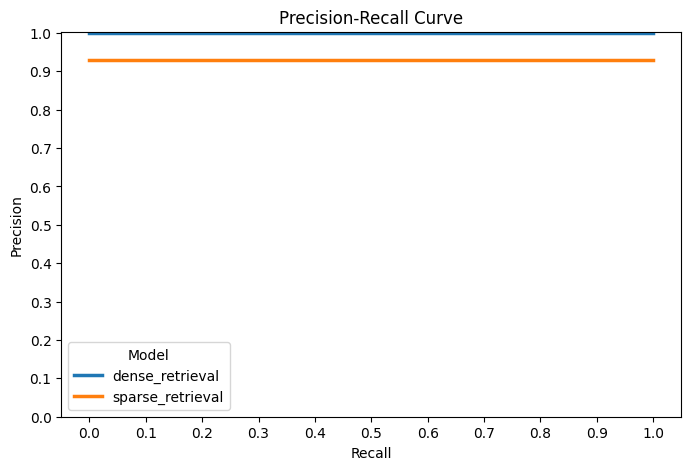

In [18]:
from ranx import Qrels, Run, plot

runs = [dense_run,sparse_run]

plot(qrels, runs, graph="iprec_at_recall", figsize=(8, 5))

Sparse vectors are an important method of data representation in information retrieval and natural language processing. While dense vectors are popular for their excellent semantic understanding capabilities, sparse vectors often provide more accurate results when it comes to applications that require precise matching of keywords or phrases.